In [1]:
import world
import agents
from ff import Solved
import ff
import pddl_functions
from teacher import TeacherAgent
import os
import numpy as np
from scipy.stats import norm
import goal_updates
from scipy.stats import norm
from prob_model import ColourModel

backend module://ipykernel.pylab.backend_inline version unknown


findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/Users/mappelgren/Desktop/fnlp/venv/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/Users/mappelgren/Desktop/fnlp/venv/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


[1 1 1]


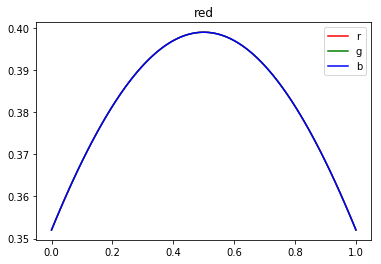

In [2]:
cm = ColourModel('red')
print(cm.sigma1)

cm.draw()

In [ ]:
agents.RandomAgent()

In [2]:
w = world.PDDLWorld('blocks-domain.pddl', 'onerule/problem4.pddl')
w2 = world.PDDLWorld('blocks-domain.pddl', 'onerule/problem27.pddl')
teacher = TeacherAgent()
agent = agents.RandomAgent(w, teacher=teacher, threshold=0.7)
agent.new_world(w)
# w.test_success()
# plan = agent.plan()
# for a, args in plan:
#     if a == 'reach-goal':
#         break
#     w.update(a, args)
#     w.draw()
#     correction = agent.teacher.correction(w)
#     if correction:
#         print("T:", correction)
#         agent.get_correction(correction, a, args)
        
#         w.draw()
#         break

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem4.pddl
Parsing domain blocks-domain.pddl
Parsing problem onerule/problem27.pddl


In [9]:
from agents import read_sentence
pm = agent.rule_models[('(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))',
  '(forall (?y) (or (not (blue ?y)) (exists (?x) (and (red ?x) (on ?x ?y)))))')]

message = read_sentence('no, put red blocks on blue blocks', use_dmrs=False)
args = ['b9', 'b8']
data = agent.get_data(message, ['b9', 'b8'])
model, _ = agent.build_model(message)
model.get_message_probs(data, priors=(1.0, 0.0), visible={})
#model.p(data, visible={'blue':0}, priors=(0.5, 0.0))
#model.c2.p(1, data[model.c1.name], p_c=0.)

(1.0, 0.0)

In [66]:
np.sum(norm.pdf(data['blue'], model.c2.mu0, model.c2.sigma0))

0.9543982624302135

In [7]:
visible = {'red':0, 'blue':0, 'r':0}
priors = (0.7, 0.0)
for i in range(2):
    for j in range(2):
        for k in range(2):
            visible['red'] = i
            visible['blue'] = j
            visible['r'] = k
            prior_c1 = priors[0] #if visible[model.c1.name] == 1 else 1-priors[0]
            prior_c2 = priors[1] #if visible[model.c2.name] == 1 else 1-priors[1]
            #print(visible, prior_c1, prior_c2)
            #print(visible)
            #print('red', model.c1.p(visible[model.c1.name], data[model.c1.name], p_c=prior_c1))
            #print(prior_c2)
            #print(visible[model.c2.name])
            #print('blue', model.c2.p(visible[model.c2.name], data[model.c2.name], p_c=prior_c2))
            #if model.evaluate_correction(visible) == 1:
            #    print(visible, model.p(data, visible=visible, priors=priors))

{'red': 0, 'blue': 1, 'r': 1} 0.0
{'red': 1, 'blue': 0, 'r': 0} 0.16433829703394595


In [70]:
print('blue', model.c2.p(0, data['blue'], p_c=0.0))

blue 1.0


In [53]:
model.rule_prior

array([0.5, 0.5])

In [48]:
model.variables

['red', 'blue', 'r']

findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/Users/mappelgren/Desktop/fnlp/venv/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


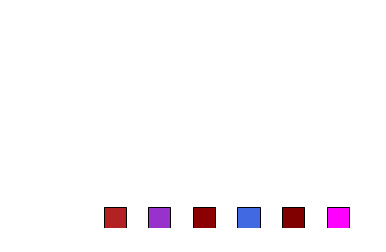

put ['b9', 't0']


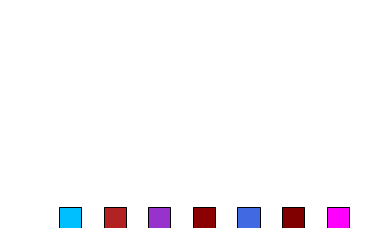

put ['b8', 'b9']


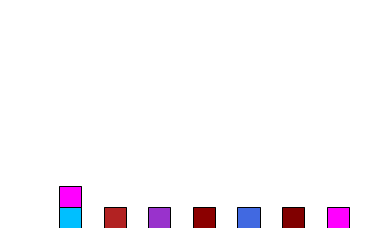

T: No, now you cannot put b0 in the tower because you must put red blocks on blue blocks


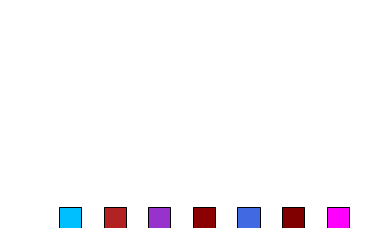

put ['b7', 'b9']


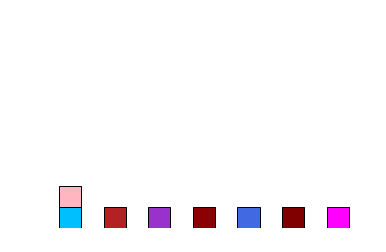

T: No, now you cannot put b0 in the tower because you must put red blocks on blue blocks


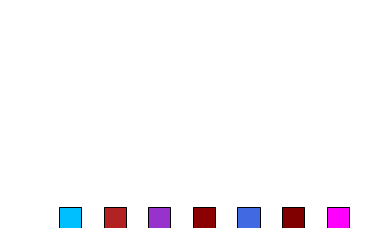

put ['b6', 'b9']


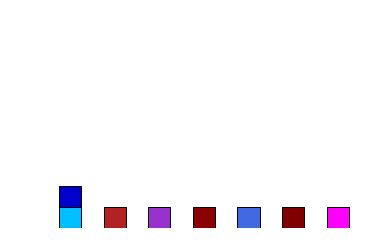

T: No, now you cannot put b0 in the tower because you must put red blocks on blue blocks


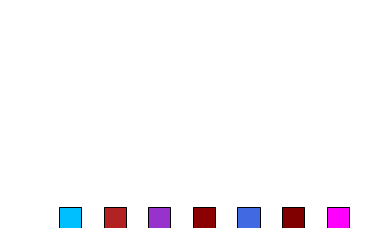

put ['b5', 'b9']


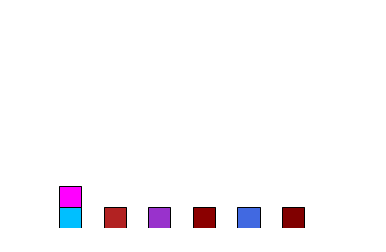

T: No, now you cannot put b0 in the tower because you must put red blocks on blue blocks


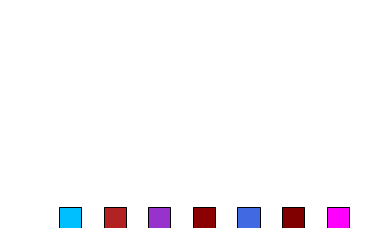

put ['b4', 'b9']


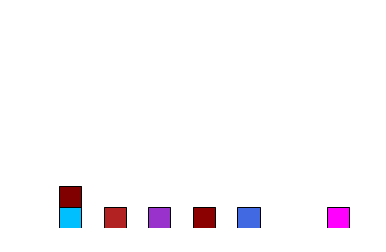

put ['b8', 'b4']


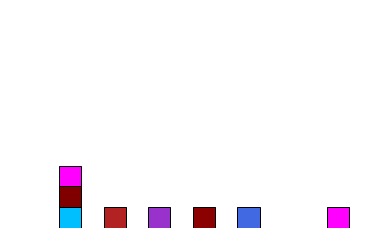

put ['b7', 'b8']


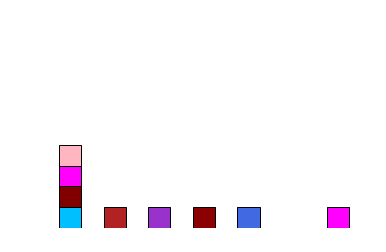

put ['b6', 'b7']


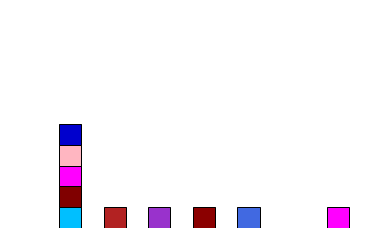

put ['b5', 'b6']


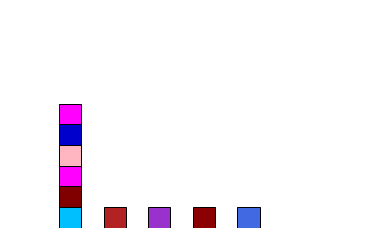

T: No, now you cannot put b0 in the tower because you must put red blocks on blue blocks


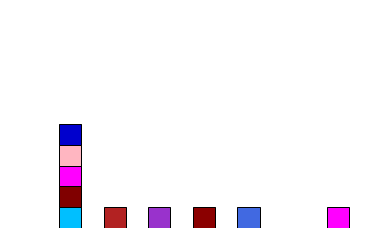

put ['b3', 'b6']


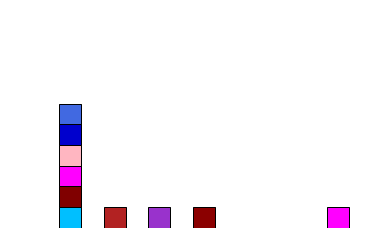

T: No, now you cannot put b0 in the tower because you must put red blocks on blue blocks


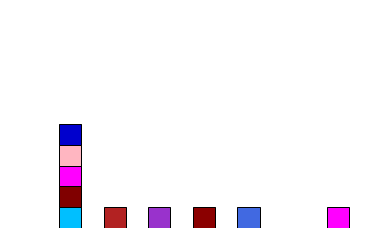

put ['b2', 'b6']


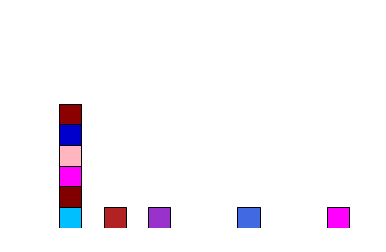

put ['b5', 'b2']


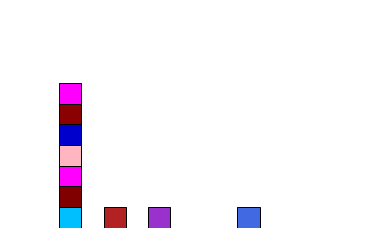

put ['b3', 'b5']


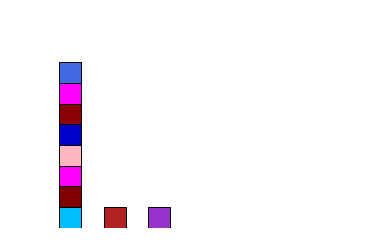

put ['b1', 'b3']


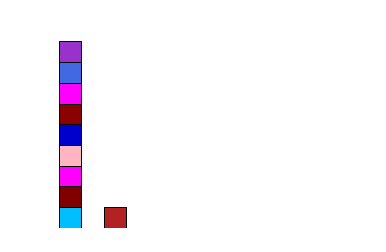

T: No, now you cannot put b0 in the tower because you must put red blocks on blue blocks


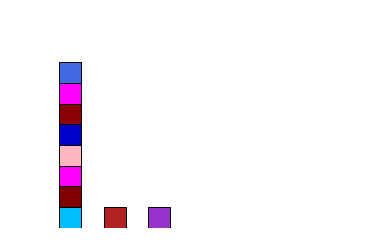

put ['b0', 'b3']


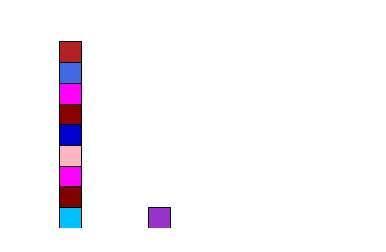

put ['b1', 'b0']


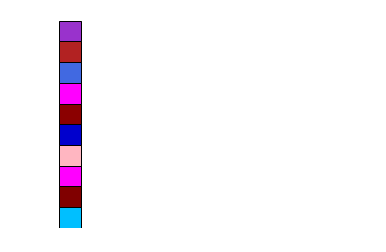

DONE
put ['b9', 't0']


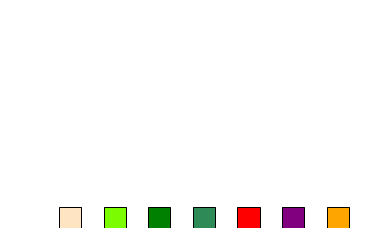

put ['b8', 'b9']


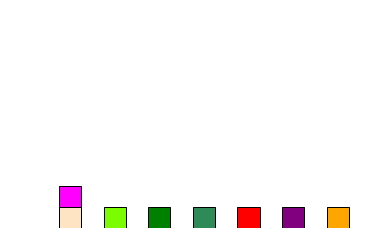

put ['b7', 'b8']


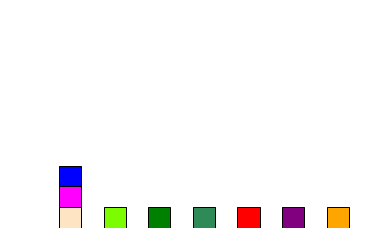

put ['b6', 'b7']


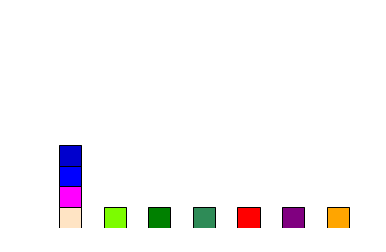

put ['b5', 'b6']


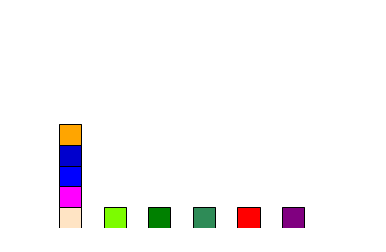

T: No, now you cannot put b3 in the tower because you must put red blocks on blue blocks


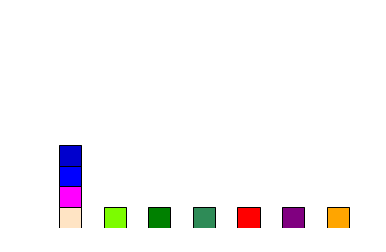

put ['b4', 'b6']


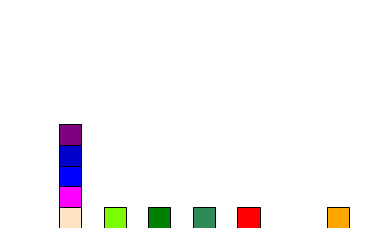

T: No, now you cannot put b3 in the tower because you must put red blocks on blue blocks


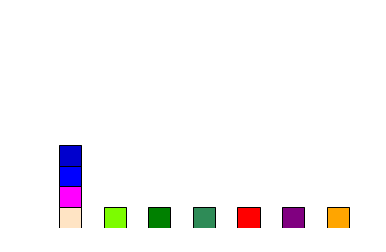

put ['b3', 'b6']


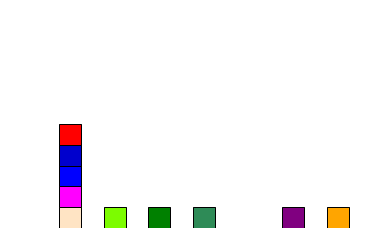

put ['b5', 'b3']


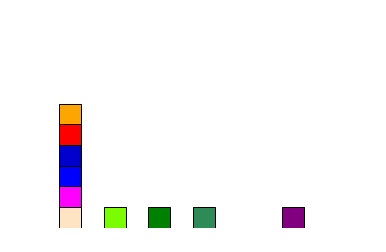

put ['b4', 'b5']


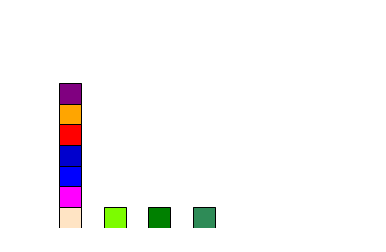

put ['b2', 'b4']


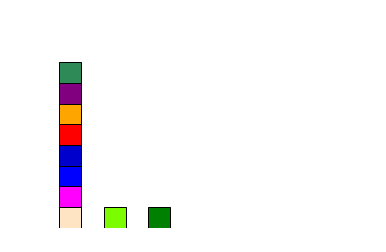

put ['b1', 'b2']


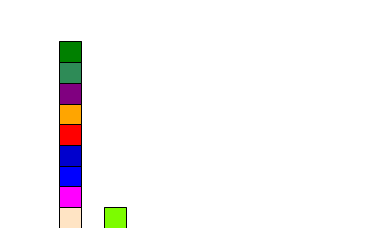

put ['b0', 'b1']


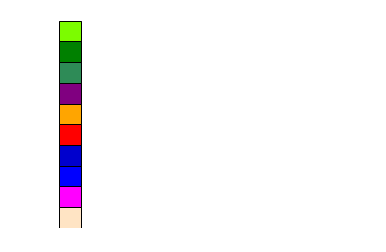

DONE


In [3]:
w.draw()
while not w.test_success():

    plan = agent.plan()
    for a, args in plan:
        if a == 'reach-goal':
            break
        w.update(a, args)
        print(a, args)
        w.draw()
        correction = agent.teacher.correction(w)
        if correction:
            print("T:", correction)
            agent.get_correction(correction, a, args)
            w.draw()
            break
        #else:
        #    agent.no_correction(a, args)
            
print('DONE')    
            
agent.new_world(w2)  
w = w2
while not w.test_success():

    plan = agent.plan()
    for a, args in plan:
        if a == 'reach-goal':
            break
        w.update(a, args)
        print(a, args)
        w.draw()
        correction = agent.teacher.correction(w)
        if correction:
            print("T:", correction)
            agent.get_correction(correction, a, args)
            w.draw()
            break
        #else:
        #    agent.no_correction(a, args)
            
print('DONE')

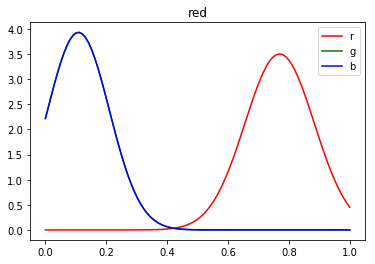

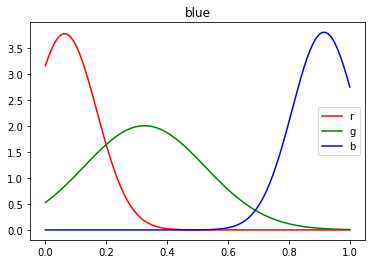

In [5]:
agent.colour_models['red'].draw()
agent.colour_models['blue'].draw()

In [15]:
mu = agent.colour_models['red'].mu0
sigma = agent.colour_models['red'].sigma0
print(mu)
print(sigma)
x = np.linspace(0,1, 100)
norm.pdf(x, loc=mu, scale=sigma)
x

[0.54192167 0.03521631 0.03521631]
[0.2650616  0.29125568 0.29125568]


ValueError: operands could not be broadcast together with shapes (100,) (3,) 

In [7]:
print(agent.problem.goal.asPDDL())

(and (forall (?x) (in-tower ?x)) (and (not (on b5 b6)) (not (on b4 b6)) (not (on b2 b6))))


In [13]:
agent.problem.goal.subformulas[2].asPDDL()

'(and (not (on b5 b6)) (not (on b5 b4)))'

In [6]:
def run_experiment(problem_dir, vis=True):
    with open('result_file.txt', 'a') as f:
        f.write('Results for {}\n'.format(problem_dir))
    total_reward = 0
    problems = os.listdir(problem_dir)
    w = world.PDDLWorld('blocks-domain.pddl', '{}/{}'.format(problem_dir, problems[0]))
    teacher = TeacherAgent()
    agent = agents.CorrectingAgent(w, teacher=teacher)
    for problem in problems:
        w = world.PDDLWorld('blocks-domain.pddl', '{}/{}'.format(problem_dir, problem))
        agent.new_world(w)
        while not w.test_success():
            plan = agent.plan()
            for a, args in plan:
                if a == 'reach-goal':
                    break
                w.update(a, args)
                if vis:
                    w.draw()
                correction = agent.teacher.correction(w)
                if correction:
                    print("T:", correction)
                    agent.get_correction(correction, a, args)
                    if vis:
                        w.draw()
                    break
                #else:
                #    agent.no_correction(a, args)
        total_reward += w.reward
        print('{} reward: {}'.format(problem, w.reward))
        with open('result_file.txt', 'a') as f:
            f.write('{} reward: {}\n'.format(problem, w.reward))
            f.write('{} cumulative reward: {}\n'.format(problem, total_reward))
        
    print('total reward: {}'.format(total_reward))
    with open('result_file.txt', 'a') as f:
        f.write('total reward: {}\n'.format(total_reward))
    agent.colour_models['red'].draw()
    agent.colour_models['blue'].draw()

In [ ]:
run_experiment('onerule', vis=False)

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem1.pddl
Parsing domain blocks-domain.pddl
Parsing problem onerule/problem1.pddl
T: No, now you cannot put b1 in the tower because you must put red blocks on blue blocks
T: No, now you cannot put b1 in the tower because you must put red blocks on blue blocks
R: Is the top object red?
T: no
T: No, now you cannot put b1 in the tower because you must put red blocks on blue blocks
R: Is the top object red?
T: no
problem1.pddl reward: -16
Parsing domain blocks-domain.pddl
Parsing problem onerule/problem10.pddl


In [4]:
np.argmax

NameError: name 'np' is not defined

NameError: name 'np' is not defined

Parsing domain blocks-domain.pddl
Parsing problem onerule/problem1.pddl
Parsing domain blocks-domain.pddl
Parsing problem onerule/problem1.pddl


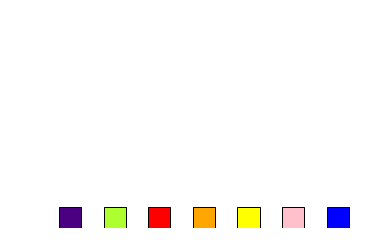

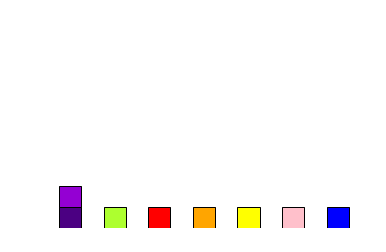

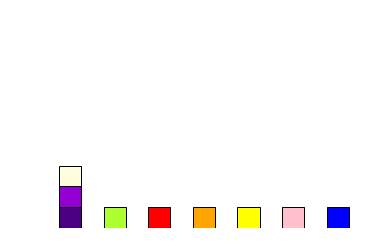

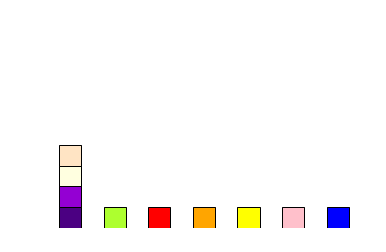

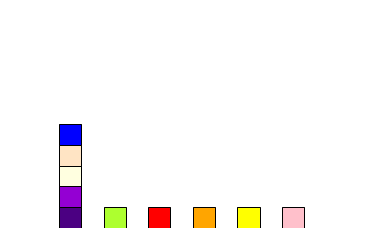

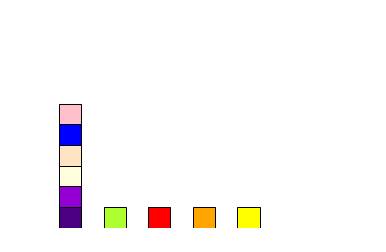

T: No, now you cannot put b1 in the tower because you must put red blocks on blue blocks


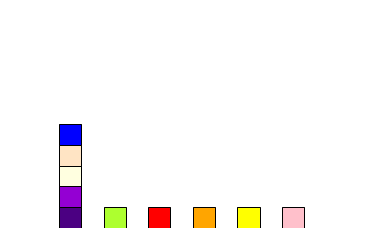

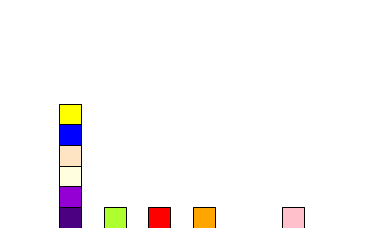

T: No, now you cannot put b1 in the tower because you must put red blocks on blue blocks


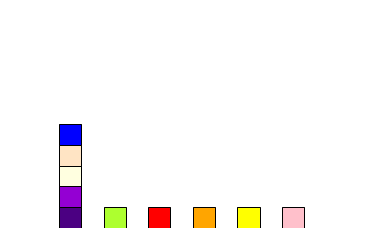

KeyboardInterrupt: 

In [8]:
problem_dir = 'onerule'
with open('result_file.txt', 'a') as f:
    f.write('Results for {}\n'.format(problem_dir))
total_reward = 0
problems = os.listdir(problem_dir)
w = world.PDDLWorld('blocks-domain.pddl', '{}/{}'.format(problem_dir, problems[0]))
teacher = TeacherAgent()
agent = agents.CorrectingAgent(w, teacher=teacher)
for problem in problems:
    w = world.PDDLWorld('blocks-domain.pddl', '{}/{}'.format(problem_dir, problem))
    agent.new_world(w)
    while not w.test_success():
        plan = agent.plan()
        for a, args in plan:
            if a == 'reach-goal':
                break
            w.update(a, args)
            w.draw()
            correction = agent.teacher.correction(w)
            if correction:
                print("T:", correction)
                agent.get_correction(correction, a, args)
                w.draw()
                break
            #else:
            #    agent.no_correction(a, args)
    total_reward += w.reward
    print('{} reward: {}'.format(problem, w.reward))
    with open('result_file.txt', 'a') as f:
        f.write('{} reward: {}\n'.format(problem, w.reward))
        f.write('{} cumulative reward: {}\n'.format(problem, total_reward))

print('total reward: {}'.format(total_reward))
with open('result_file.txt', 'a') as f:
    f.write('total reward: {}\n'.format(total_reward))
agent.colour_models['red'].draw()
agent.colour_models['blue'].draw()

In [14]:
self = agent
self.problem.goal = goal_updates.update_goal(self.goal,self.tmp_goal)
self.sense()
with open('tmp/problem.pddl', 'w') as f:
    f.write(self.problem.asPDDL())

try:
    plan = ff.run(self.domain_file, 'tmp/problem.pddl')
except NoPlanError:
    self.problem.goal = goal_updates.update_goal(goal_updates.create_default_goal(), self.tmp_goal)
    with open('tmp/problem.pddl', 'w') as f:
        f.write(self.problem.asPDDL())
    plan = ff.run(self.domain_file, 'tmp/problem.pddl')

NameError: name 'NoPlanError' is not defined

In [15]:
self.problem.goal = goal_updates.update_goal(self.goal,self.tmp_goal)

In [16]:
self.sense()

Observation(objects=['b0', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 't0'], colours={'b0': array([0.6784314 , 1.        , 0.18431373], dtype=float32), 'b1': array([1., 0., 0.], dtype=float32), 'b2': array([1.        , 0.64705884, 0.        ], dtype=float32), 'b3': array([1., 1., 0.], dtype=float32), 'b4': array([1.        , 0.7529412 , 0.79607844], dtype=float32), 'b5': array([0., 0., 1.], dtype=float32), 'b6': array([1.        , 0.89411765, 0.76862746], dtype=float32), 'b7': array([1.       , 1.       , 0.8784314], dtype=float32), 'b8': array([0.5803922, 0.       , 0.827451 ], dtype=float32), 'b9': array([0.29411766, 0.        , 0.50980395], dtype=float32)}, relations={'b0': {'on-table': <pythonpddl.pddl.Predicate object at 0x1a13703208>, 'clear': <pythonpddl.pddl.Predicate object at 0x1a13703668>, 'greenyellow': <pythonpddl.pddl.Predicate object at 0x1a13144358>}, 'b1': {'on-table': <pythonpddl.pddl.Predicate object at 0x1a13703f28>, 'clear': <pythonpddl.pddl.Predicate ob

In [17]:
print(agent.problem.asPDDL())

(define (problem block-problem)
	(:domain blocksworld)
	(:objects b0 b1 b2 b3 b4 b5 b6 b7 b8 b9 t0)
	(:init 
		(arm-empty )
		(on-table b0)
		(clear b0)
		(on-table b1)
		(clear b1)
		(on-table b2)
		(clear b2)
		(on-table b3)
		(clear b3)
		(on-table b4)
		(clear b4)
		(clear b5)
		(in-tower t0)
		(greenyellow b0)
		(orange b2)
		(pink b4)
		(bisque b6)
		(orange b6)
		(lightyellow b7)
		(darkviolet b8)
		(purple b8)
		(indigo b9)
		(purple b9)
		(on b9 t0)
		(in-tower b9)
		(on b8 b9)
		(in-tower b8)
		(on b7 b8)
		(in-tower b7)
		(on b6 b7)
		(in-tower b6)
		(on b5 b6)
		(in-tower b5)
		(red b0)
		(red b1)
		(red b2)
		(red b3)
		(red b4)
		(red b6)
		(red b7)
		(blue b1)
		(blue b2)
		(blue b3)
		(blue b4)
		(blue b5)
		(blue b6)
		(blue b7)
		(blue b8)
		(blue b9)
	)
	(:goal (and (forall (?x) (in-tower ?x)) (forall (?y) (or (not (blue ?y)) (exists (?x) (and (red ?x) (on ?x ?y))))) (and (not (on b4 b5)) (not (on b3 b5)))))
)


In [18]:
with open('tmp/problem.pddl', 'w') as f:
    f.write(self.problem.asPDDL())

In [19]:
plan = ff.run(self.domain_file, 'tmp/problem.pddl')

KeyboardInterrupt: 

In [4]:
{'c':1} + {'d':3}

TypeError: unsupported operand type(s) for +: 'dict' and 'dict'